## Plot difference between 2 30yr means of zonal mean zonal wind in :
####   all CMIP6 models containing the 1pctCO2 experiment
####   for selected season (DJF) and over selected latitude range (0-90)

##### Created as part of PAMIP group during CMIP6 hackathon 2021
##### Created by : Phoebe Hudson / Colin Manning



In [3]:
from itertools import chain
from glob import glob

import matplotlib
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

# Set figsize and resolution
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 100

# Convert this (jupyter) notebook to a python script to avoid kernel crashing in Jasmin jupyter environment
#!jupyter nbconvert --to script lpsd_cmip6_ua_multimodel_pah.ipynb

In [4]:
### Set data directory where data structure follows 
#     /badc/cmip6/data/<mip_era>/<activity_id>/<institution_id>/<source_id>/<experiment_id>/<variant_label>/<table_id>/<variable_id>/<grid_label>/<version>
#   and experiment id follows
#     r = realization, i = initialization, p = physics, f = forcing

data_dir = "/badc/cmip6/data/CMIP6/CMIP/*/*/1pctCO2/*/Amon/ua/gn/latest"

#!ls {data_dir}
data_in_dir_paths = glob(data_dir)
#data_in_dir_paths

In [18]:
### Extract ensemble member name from pathname in an element (the 0th) of the data_in_dir_paths list 

#data_in_dir_paths[0].split(sep='/')[9]

In [5]:
### Create dictionary of model names (element 7) and associated ensemble members (element 9)

models = {}
for i in range(0,len(data_in_dir_paths)):
    model_name = data_in_dir_paths[i].split(sep='/')[7]
    if model_name not in models:
        models[model_name] = [data_in_dir_paths[i].split(sep='/')[9]] # assign member to list
    else:
        models[model_name].append(data_in_dir_paths[i].split(sep='/')[9])
        
#models

In [22]:
### Create list of 30 yr differences in zonal mean zonal wind for each model in dictionary "models"

# Calculate zonal mean of zonal wind (mean over all longitudes) and sub-select by latitude (N hem = 0,90)
# Select winter months (DJF=Dec-Feb) from zonal mean zonal wind
# Calculate difference between two 30-yr means of zonal mean zonal winds for the 1pctCO2 experiment over
#     1850-01-16-1880-12-16 and 
#     1969-01-16-1999-12-16

ds_all_models_list = []
for model in models:
    i=0
    print(model)
    for member in (models[model]):
        model_data_dir = "/badc/cmip6/data/CMIP6/CMIP/*/"+ str(model)+"/1pctCO2/"+str(member)+"/Amon/ua/gn/latest/*"
        data_in_dir_paths = glob(model_data_dir)
        
        if len(data_in_dir_paths)>0 :
            #print(len(data_in_dir_paths))
            ds_n = xr.open_mfdataset(data_in_dir_paths)
            #print(ds_n)
            
            ds_n = ds_n.mean(dim='lon').sel(lat=slice(0, 90))
            is_winter = ds_n['time'].dt.season == 'DJF'
            ds_n_winter = ds_n.isel(time=is_winter)
            ds_n_endyrs = ds_n_winter.sel(time=slice('1969-01-16', '1999-12-16')).mean(dim='time')
            ds_n_startyrs = ds_n_winter.sel(time=slice('1850-01-16', '1880-12-16')).mean(dim='time')
            ds_n_yrsdiff = ds_n_endyrs - ds_n_startyrs
            if i==0 : 
                ds_t = ds_n_yrsdiff
            if i>0 : 
                ds_t = ds_t + ds_n_yrsdiff
            i+=1
    ds_t = ds_t/i
    ds_t['plev'] = ds_t.plev.values/100
    ds_all_models_list.append(ds_t)
    
    ### Alternative to a list is to write out datasets (ds_t) to netcdf 
    #      datasets as a list makes the above script quicker BUT takes longer to plot (below)
    #      datasets saved as netcdf files is quicker to plot BUT it takes longer to create the files
    #   If you want to create netcdf files - look at Colin's script + submit a LOTUS batch job
    
    #ds_t.to_netcdf('/gws/pw/j05/cop26_hackathons/bristol/project05/cmip6_zonal_ensemble_mean/'+str(model)+'_ensmean_DJF_zonal_mean_ua_Amon_diff_2069-2099_1850-1880.nc')
    #ds_t.to_netcdf('/home/users/phohud/pah_phd_scripts/cmip6_hack/cmip6_zonal_ensmean/'+str(model)+'_ensmean_DJF_zonal_mean_ua_Amon_diff_2069-2099_1850-1880.nc')


AWI-CM-1-1-MR
151
BCC-CSM2-MR
4
BCC-ESM1
1
CAMS-CSM1-0
10
CanESM5
1
1
1
1
1
1
ACCESS-ESM1-5
2


/home/users/phohud/.conda/envs/pah_enviro/lib/python3.8/site-packages/xarray/coding/times.py:119: SerializationWarning: Ambiguous reference date string: 101-01-01. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0101-01-01). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)
/home/users/phohud/.conda/envs/pah_enviro/lib/python3.8/site-packages/xarray/coding/times.py:527: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/users/phohud/.conda/envs/pah_enviro/lib/python3.8/site-packages/numpy/core/_asarray.py:102: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cfti

ACCESS-CM2
2


/home/users/phohud/.conda/envs/pah_enviro/lib/python3.8/site-packages/xarray/coding/times.py:119: SerializationWarning: Ambiguous reference date string: 950-01-01. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0950-01-01). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)
/home/users/phohud/.conda/envs/pah_enviro/lib/python3.8/site-packages/xarray/coding/times.py:527: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/users/phohud/.conda/envs/pah_enviro/lib/python3.8/site-packages/numpy/core/_asarray.py:102: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cfti

MIROC6
15


/home/users/phohud/.conda/envs/pah_enviro/lib/python3.8/site-packages/xarray/coding/times.py:527: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/users/phohud/.conda/envs/pah_enviro/lib/python3.8/site-packages/numpy/core/_asarray.py:102: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


HadGEM3-GC31-LL
2
2
2
2
HadGEM3-GC31-MM
8
UKESM1-0-LL
2
2
2
2
MRI-ESM2-0
4
GISS-E2-1-G
3
GISS-E2-1-H
3
CESM2
3


/home/users/phohud/.conda/envs/pah_enviro/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'ua' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


CESM2-WACCM
3


/home/users/phohud/.conda/envs/pah_enviro/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'ua' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


SAM0-UNICON
15


/home/users/phohud/.conda/envs/pah_enviro/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


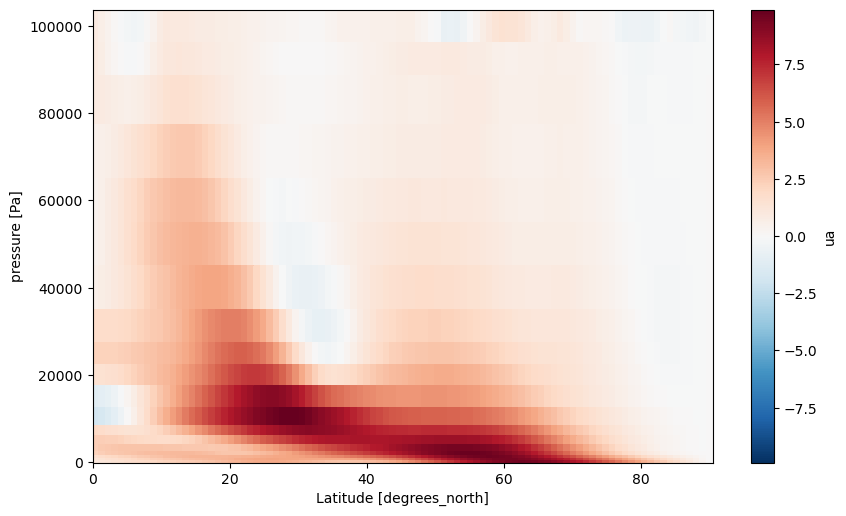

In [23]:
### Plot the zonal mean zonal wind 30 yr diff in the last dataset loaded in above

ds_t.ua.plot()

In [29]:
### Turn the dictionary (models) into a list of model names

models_list = list(models.keys())
len(models)

17

AWI-CM-1-1-MR


KeyboardInterrupt: 

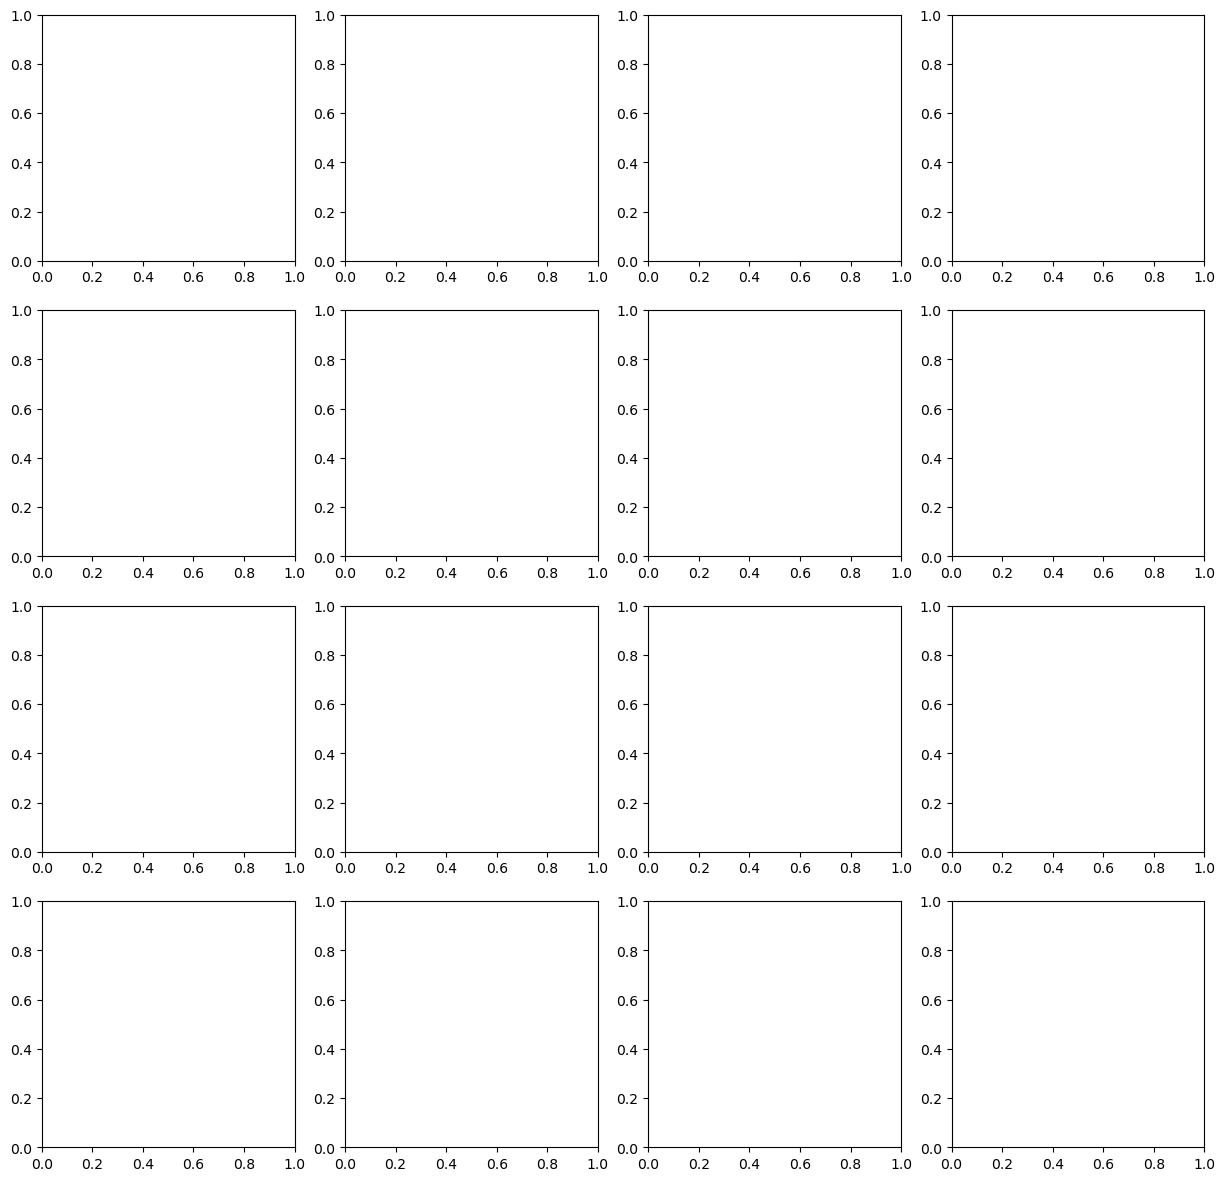

In [30]:
### Plot the difference in 30 yr mean zonal mean zonal wind for the first nplot**2 models (16) and save fig
#     NOTE : This failed every time I tried to run it in the jasmin jupyter notebook environment (kernel died)
#     I suggest you convert this notebook to a python file and run that from the command line

#ds_lonmean.ua.sel(time='1850-01-16').plot()
cmap = plt.get_cmap('RdBu_r')
axs = []
nplots = 4

fig, axes = plt.subplots(nrows=nplots, ncols=nplots, figsize=(15,15))
for i in range(0,nplots**2): #len(ds_all_models_list))
    print(models_list[i])
    ds_i = ds_all_models_list[i]
    ax = plt.subplot(nplots,nplots,i+1)
    plt.contourf(ds_i.lat, ds_i.plev, ds_i.ua.values, cmap='RdBu_r', levels=np.arange(-1,1,0.1), extend='both')
    #plt.pcolormesh(ds_lonmean.lat, ds_lonmean.plev, ds_lonmean_yrsdiff.ua.values, cmap='RdBu_r')
    plt.xlabel('Lat')
    plt.ylabel('Pressure (hPa)')
    plt.ylim([1000, 100]) #[100000, 10000])
    plt.title(str(models_list[i]))
    axs=np.append(axs,ax)

normalize=matplotlib.colors.Normalize(vmin=-1, vmax=1)
cax, _ = matplotlib.colorbar.make_axes(axs, location = "bottom", pad=0.05)
cbar = matplotlib.colorbar.ColorbarBase(cax, cmap=cmap, norm=normalize,orientation="horizontal")
#cbar.set_label('Zonal windspeed ',size=16)
cbar.ax.tick_params(labelsize=16)
plt.show()
figdir = '/home/users/phohud/pah_phd_scripts/cmip6_hack/project05/results/'
fig.savefig((figdir+'cmip6_'+str(int(nplots**2))+'model_zonal_mean_diff_1pctCO2_1969-1999_1850-1880.png'), dpi=100, transparent=False, bbox_inches='tight', pad_inches=0.1)
